# Modelos Generativos para Recuperação de Informação

Nome: Arthur Pontes Nader

Matrícula: 2019022294

In [1]:
import asyncio
import urllib3

from urllib.parse import urljoin
from bs4 import BeautifulSoup
from playwright.async_api import async_playwright

## Crawler

#### 1 - Gerar links

In [2]:
async def gerar_links(url_page):
    
    playwright = await async_playwright().start()
    browser = await playwright.chromium.launch(headless = True)
    page = await browser.new_page()
    await page.goto(url_page)
    resultados = set()
    
    try:
        page_data = await page.content()
        
    except:
        await page.close()
        await browser.close()
        
        return "Error: " + url_page

    soup = BeautifulSoup(page_data, "xml")
    links = soup.find_all('a')
    counter = 0

    for link in links:

        if("href" in link.attrs):
            url = urljoin(url_page, str(link.get('href')))

            if url.find("'") != -1:
                continue

            url = url.split("#")[0]
            resultados.add(url)
            counter += 1
        
    print("Number of links: " +  str(len(resultados)))
    
    await page.close()
    await browser.close()
    
    return resultados

In [3]:
loop = asyncio.get_event_loop()
resultados = loop.create_task(gerar_links("https://dcc.ufmg.br/"))

In [8]:
resultados.result()

{'http://40anos.dcc.ufmg.br/',
 'http://ufmg.br/comunicacao/noticias/acervo-da-sala-helena-antipoff-na-biblioteca-central-e-registrado-como-patrimonio-da-ufmg',
 'http://ufmg.br/comunicacao/noticias/alem-da-performance-pesquisa-analisa-reconhecimento-e-politizacao-de-drag-queens',
 'http://ufmg.br/comunicacao/noticias/combater-a-infodemia-e-crucial-para-resgatar-a-cobertura-vacinal',
 'http://ufmg.br/comunicacao/noticias/edital-de-selecao-de-estagiario-para-o-profibio-e-retificado-inscricoes-foram-prorrogadas',
 'http://ufmg.br/comunicacao/noticias/espaco-do-conhecimento-tem-programacao-especial-para-as-ferias-de-julho',
 'http://ufmg.br/comunicacao/noticias/ica-participa-de-projeto-do-governo-federal-e-da-fiocruz-dedicado-a-plantas-medicinais',
 'http://ufmg.br/comunicacao/noticias/laboratorio-da-ufmg-analisa-o-movimento-humano-atraves-de-tecnologia-avancada',
 'http://ufmg.br/comunicacao/noticias/marta-sobral-do-ministerio-do-esporte-visita-cte-espaco-maravilhoso',
 'http://ufmg.br/c

#### ChatGPT

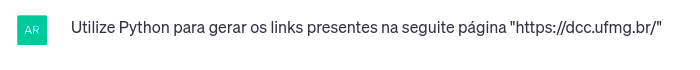

In [9]:
import requests
from bs4 import BeautifulSoup

# Faz a solicitação HTTP à página
url = "https://dcc.ufmg.br/"
response = requests.get(url)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Extrai os links da página usando o BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    links = soup.find_all("a")

    # Imprime os links encontrados
    for link in links:
        href = link.get("href")
        print(href)
else:
    print("Falha ao acessar a página:", response.status_code)

#content
/
/sobre-o-dcc/
/chefia-e-coordenadores/
/nossa-camara-departamental/
/membros-da-camara-departamental/
/participacao-de-docentes-em-chefias-comissoes-e-representacoes/
/infraestrutura/
/crc/
/nossos-laboratorios/
http://40anos.dcc.ufmg.br/
https://lattes.dcc.ufmg.br/
https://lattes.dcc.ufmg.br/premiosANO.html
/contatos/
/nossos-cursos/
/bacharelado-em-ciencia-da-computacao/
/bacharelado-em-matematica-computacional/
/bacharelado-em-sistemas-de-informacao/
/especializa/
/mestrado/
/doutorado/
/nossos-cursos-de-extensao/
/pesquisa-desenvolvimento-e-inovacao/
https://lattes.dcc.ufmg.br/
https://lattes.dcc.ufmg.br/livrosPROFESSOR.html
https://lattes.dcc.ufmg.br/artigosANO.html
/projetos-de-pesquisa/
/grupos-de-pesquisa/
/nossos-laboratorios/
https://www.embrapii.dcc.ufmg.br/
/cooperacao-2/
/incentivos-fiscais-financiamento-de-projetos/
/parcerias-extensao/
https://www.embrapii.dcc.ufmg.br/
/cooperacao/
/consultoria/
/treinamento-empresa/
/parcerias-de-sucesso/
/pop-mg/
/ponto-de-t

#### 2 - Gerar apenas links que contenham palavras chaves e que não saiam da url base

In [3]:
async def gerar_links_2(url_page):
    
    playwright = await async_playwright().start()
    browser = await playwright.chromium.launch(headless = True)
    page = await browser.new_page()
    await page.goto(url_page)
    resultados = set()
    
    try:
        page_data = await page.content()
        
    except:
        await page.close()
        await browser.close()
        
        return "Error: " + url_page

    soup = BeautifulSoup(page_data, "xml")
    links = soup.find_all('a')
    counter = 0

    for link in links:

        if("href" in link.attrs):
            url = urljoin(url_page, str(link.get('href')))

            if url.find("'") != -1:
                continue

            url = url.split("#")[0]
            
            if ("pesquisa" in url or "noticia" in url) and url.startswith("https://dcc"):
                resultados.add(url)
                counter += 1
        
    print("Number of links: " +  str(len(resultados)))
    
    await page.close()
    await browser.close()
    
    return resultados

In [4]:
loop = asyncio.get_event_loop()
resultados = loop.create_task(gerar_links_2("https://dcc.ufmg.br/"))

In [6]:
resultados.result()

{'https://dcc.ufmg.br/grupos-de-pesquisa/',
 'https://dcc.ufmg.br/noticias/',
 'https://dcc.ufmg.br/pesquisa-desenvolvimento-e-inovacao',
 'https://dcc.ufmg.br/pesquisa-desenvolvimento-e-inovacao/',
 'https://dcc.ufmg.br/projetos-de-pesquisa/'}

#### ChatGPT

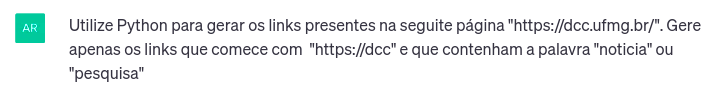

In [8]:
import requests
from bs4 import BeautifulSoup

# Faz a requisição GET à página
response = requests.get("https://dcc.ufmg.br/")

# Verifica se a requisição foi bem-sucedida
if response.status_code == 200:
    # Extrai o conteúdo HTML da resposta
    html = response.content

    # Cria um objeto BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")

    # Encontra todos os elementos <a> com href começando com "https://dcc"
    links = soup.find_all("a", href=lambda href: href and href.startswith("https://dcc"))

    # Filtra os links que contêm as palavras "noticia" ou "pesquisa"
    filtered_links = [link["href"] for link in links if "noticia" in link["href"] or "pesquisa" in link["href"]]

    # Imprime os links filtrados
    for link in filtered_links:
        print(link)

#### 3 - Gerar e seguir links a partir de uma url base até os links de profundidade 3

In [2]:
def gerar_links(url_page):
    
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    http = urllib3.PoolManager()
    resultados = []
    
    try:
        page_data = http.request('GET', url_page)
    except:
        print("Error: " + url_page)


    soup = BeautifulSoup(page_data.data, "xml")

    links = soup.find_all('a')
    counter = 0

    for link in links:

        if("href" in link.attrs):
            url = urljoin(url_page, str(link.get('href')))

            if url.find("'") != -1:
                continue

            url = url.split("#")[0]
            resultados.append(url)
            counter += 1
    
    return resultados

In [3]:
def crawl(pagina_inicial, profundidade):
    
    paginas_visitadas, paginas, dic = set(), set(), dict()
    paginas.add(pagina_inicial)
    dic[0] = [pagina_inicial]

    for i in range(1, profundidade+1):
        
        dic[i] = []
        
        novas_paginas = set()
        print("Actual depth: " + str(i))
        
        for pagina in paginas:
            
            paginas_visitadas.add(pagina)
            resultados =  gerar_links(pagina)
            
            links = list(set(resultados))
            links = [l for l in links if l.startswith('http://cidadesmg')]
    
            dic[i] += links
            novas_paginas = novas_paginas.union(set(links))
        
        paginas = novas_paginas.difference(paginas_visitadas)
        
    return dic

In [4]:
resultados = crawl("http://cidadesmg.com.br/portaltransparencia/faces/user/portal.xhtml?Param=PedraAzul", 3)

Actual depth: 1
Actual depth: 2
Actual depth: 3


In [5]:
for nivel, urls in resultados.items():
    
    print("Nível: ", nivel)
    print("Total de urls no nível: ", len(urls))
    print("Urls: ", urls[:5], "\n")

Nível:  0
Total de urls no nível:  1
Urls:  ['http://cidadesmg.com.br/portaltransparencia/faces/user/portal.xhtml?Param=PedraAzul'] 

Nível:  1
Total de urls no nível:  15
Urls:  ['http://cidadesmg.com.br/portaltransparencia/faces/user/resto.xhtml?Param=PedraAzul', 'http://cidadesmg.com.br/portaltransparencia/faces/user/folha.xhtml?Param=PedraAzul', 'http://cidadesmg.com.br/portaltransparencia/faces/user/pcontas.xhtml?Param=PedraAzul', 'http://cidadesmg.com.br/portaltransparencia/faces/user/portal.xhtml?Param=PedraAzul', 'http://cidadesmg.com.br/portaltransparencia/faces/user/lrf.xhtml?Param=PedraAzul'] 

Nível:  2
Total de urls no nível:  49
Urls:  ['http://cidadesmg.com.br/portaltransparencia/faces/user/portal.xhtml?Param=PedraAzul', 'http://cidadesmg.com.br/portaltransparencia/faces/user/resto/FRestoAPagar.xhtml?Param=PedraAzul', 'http://cidadesmg.com.br/portaltransparencia/faces/user/folha/FAgentePolitico.xhtml?Param=PedraAzul', 'http://cidadesmg.com.br/portaltransparencia/faces/us

#### ChatGPT

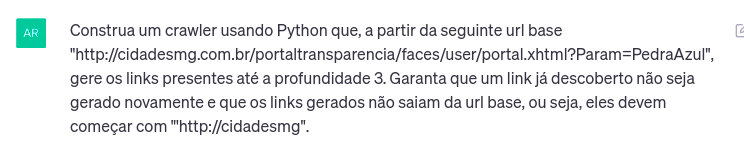

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def crawler(url, depth=1, max_depth=3):
    visited = set()  # Conjunto para armazenar links visitados
    links = set([url])  # Conjunto para armazenar links a serem visitados

    while depth <= max_depth:
        next_links = set()  # Conjunto temporário para armazenar os próximos links a serem visitados

        for link in links:
            if link in visited:
                continue

            visited.add(link)
            print(link)  # Imprimir ou fazer qualquer processamento desejado com o link

            try:
                response = requests.get(link)
                soup = BeautifulSoup(response.content, 'html.parser')

                # Encontrar todos os links na página
                for anchor in soup.find_all('a'):
                    href = anchor.get('href')
                    absolute_url = urljoin(url, href)

                    # Verificar se o link pertence à URL base e não foi visitado antes
                    if absolute_url.startswith('http://cidadesmg') and absolute_url not in visited:
                        next_links.add(absolute_url)

            except Exception as e:
                print(f"Ocorreu um erro ao processar o link: {link}")
                print(e)

        links = next_links
        depth += 1

# URL base
base_url = "http://cidadesmg.com.br/portaltransparencia/faces/user/portal.xhtml?Param=PedraAzul"

# Executar o crawler
crawler(base_url, depth=0, max_depth=3)

http://cidadesmg.com.br/portaltransparencia/faces/user/portal.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/convenios.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/admin/admin.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/receita.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/resto.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/diariasDeViagem.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/orcamento.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/pcontas.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/covid19.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/oPortal.xhtml
http://cidadesmg.com.br/portaltransparencia/faces/user/folha.xhtml?Param=PedraAzul
http://cidadesmg.com.br/portaltransparencia/faces/user/licitacao.xhtml?Para